In [1]:
import numpy as np                 #loading in numpy
from matplotlib import pyplot as plt      #load matplotlib
import math                        # load math 
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline

## Couette Flow of Incompressible Flow: Pressure Correction Method
We will now look at another way to solve the Couette flow problem presented in Chapter 9 of The pressure correction method looks at sovling the problem in two dimensions. Although our problem still consists of twho infinitely long flat plates, our computational plane is finite. In this case we will construct a 2D model that is 0.5 ft long and 0.01 ft tall.The upper surface will be moving at some velocity $u_e$ and the density of our fluid will be 0.002377 slug/ft^3. The value of $u_e$ will be set to 1 ft/set resulting in a Retnolds number of 63.6. We will build the grid by staggering three different grids for velocity in x, velocity in y, and pressure. The plot below shows the make up of the different grids. Individually, each grid will have their own index, but the will be staggered in relation to eachother. 

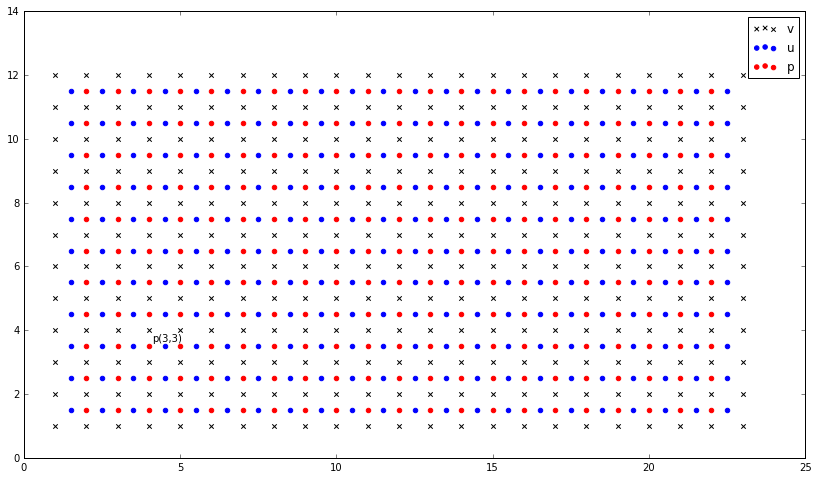

In [13]:
plt.figure(figsize=(14,8))
xvalues = np.linspace(1,23,23);
yvalues = np.linspace(1,12,12);
vx, vy = np.meshgrid(xvalues, yvalues)
fig = plt.scatter(vx, vy, marker='x', color='k',label='v')
xvalues = np.linspace(1,22,22)+0.5;
yvalues = np.linspace(1,11,11)+0.5;
vx, vy = np.meshgrid(xvalues, yvalues)
fig = plt.scatter(vx, vy, marker='o', color='b',label='u')
xvalues = np.linspace(1,21,21)+1;
yvalues = np.linspace(1,11,11)+0.5;
vx, vy = np.meshgrid(xvalues, yvalues)
fig = plt.scatter(vx, vy, marker='o', color='r',label='p')
plt.xlim([0,25])
plt.ylim([0,14])
plt.text(4.1,3.65,'p(3,3)')
plt.legend()

The grids will have the followig dimensions:

Pressure: 21 x 11

u (velocity in x): 22x11

v (velocity in y): 23x12

For the pressure correction method, we will use the notation of $*$ to denote a guessed value. The basic steps for this method is:

**1.** Guess pressure $p^*$

**2.** Use guessed pressure $p^*$ to get $u^*$ and $v^*$

**3.** Substitude $p^*$, $u^*$, and $v^*$ into the continuity equation. Use the continum equaiton to construct a pressure correction $p'$. Then our corrected pressures and corresponding flow variables will be:

$$p=p^* + p'$$

$$u=u^* + u'$$

$$v=v^* + v'$$

**4.** The corrected value of $p$ is the new $p^*$ and we will go back to step 2 and iterate until we have a flow field that satisfies th continuity equation.

Because this is an iterative solution, we need to state our initial conditions. For all nodes except (i,j)=(15,5), the values are:

$$u =v =0$$

$$p^* = p' =0$$

The boundary values are set as:

Upper wall:

$u = u_e$

$v=0$

Lower wall:

$u = v = 0$

Inflow:

$p' =0$

$v=0$

Outflow:

$p'=0$

These boundary conditions are held constant through the entire iteration process. The variables not stated as constant in these boundary condition are allowed to float. Additionally, instead of enforcing a zero-pressure gradient at the wall, we will enfore that that at the wall $p'=0$. A constant pressure gradient is allowable here because the steady state solution has a uniform pressure.

Now we must address the condition at (15,5). At this point in our grid, we will set $v = 0.5$ $ft/sec$. this is one half of the velocity at the upper wall boundary condition. This is called a "velocity spike", and it will  produce a two dimensional flow during the iterative process. We are interested in a 2D solution that has some variation in the x axis and this initial condition guarantees this. Also, the dissipation of this velocity will be a good metric in showing that our pressure correction technique is working. It is important to note that this is not an accurate transient simulation. The iterations are like little steps in time, but they do not accurately represent a transient simulation. The pressure correction method is only accurate in the steady state configuration. Now we will get into the steps of solving this well posed problem.

**Step 1:** Guess at values of $p^*$ at all of the interior grid points. Set values for $(\rho u^*)^n$ and $(\rho v^*)^n$ at all grid point arbitrarily. Note that all of these values will be zero except for $u_e=1$ ft/sec at the upper wall and $v^*_{15,5} = 0.5$ ft/sec at the velocity spike.

**Step 2:** Solve for $(\rho u^*)^{n+1}$ and $(\rho v^*)^{n+1}$ forall interior points with the following two equations


$$(\rho u^*)^{n+1}_{i+1/2,j} = (\rho u^*)^n_{i+1/2,j}+ A^* \Delta t - \frac{\Delta t}{\Delta x}(p^*_{i+1,j}-p^*_{i,j})$$

$$(\rho v^*)^{n+1}_{i,j+1/2} = (\rho v^*)^n_{i,j+1/2}+ B^* \Delta t - \frac{\Delta t}{\Delta x}(p^*_{i,j+1}-p^*_{i,j})$$

Where

$$A^* = -\Big[\frac{(\rho u^2)^n_{i+3/2,j}-(\rho u^2)^n_{i-1/2,j}}{2\Delta x} + \frac{(\rho u \bar{v})^n_{i+1/2,j+1} - (\rho \bar{\bar{v}})^n_{i+1/2,j-1}}{2 \Delta y} \Big] + \mu \Big[ \frac{u^n_{i+3/2,j}-2u^n_{i+1/2,j}+u^n_{i-1/2,j}}{(\Delta x)^2} + \frac{u^n_{i+1/2,j+1}-2u^n_{i+1/2,j}+u^n_{i+1/2,j-1}}{(\Delta y)^2} \Big]$$

$$\bar{v} = \frac{1}{2}(v^n_{i,j+1/2}+ v^n_{i+1,j+1/2})$$

$$\bar{\bar{v}} = \frac{1}{2}(v^n_{i,j-1/2}+ v^n_{i+1,j-1/2})$$

and 

$$B^* = -\Big[ \frac{(\rho v \bar{u})^n_{i+1,j+1/2}-(\rho v \bar{\bar{u}})^n_{i-1,j+1/2} }{2\Delta x} + \frac{(\rho v^2)^n_{i,j+3/2} - (\rho v^2)^n_{i,j-1/2}}{2 \Delta y} \Big] + \mu \Big[ \frac{v^n_{i+1,j+1/2}-2v^n_{i,j+1/2}+v^n_{i-1,j+1/2} }{(\Delta x)^2} + \frac{v^n_{i,j+3/2}-2v^n_{i,j+1/2}+v^n_{i,j-1/2} }{(\Delta y)^2} \Big]$$

$$\bar{u} = \frac{1}{2}(u^n_{i+1/2,j}+ u^n_{i+1/2,j+1})$$

$$\bar{\bar{u}} = \frac{1}{2}(u^n_{i-1/2,j}+ u^n_{i-1/2,j+1})$$

Now we have a bunch of long equations with some very confusing indexing. To attempt to understand how this indexing works with the actual computation, let's do an example. We will begin by writing the above equations for the pressure grid point (3,3). This point is marked on the figure above for a visual reference. The location (3,3) does not represent it's global location, but the index of where it is within the pressure grid. 

$$(\rho u^*)^{n+1}_{4,3} = (\rho u^*)^n_{4,3}+ A^* \Delta t - \frac{\Delta t}{\Delta x}(p^*_{4,3}-p^*_{3,3})$$

and the corresponding $A^*$ value

$$A^* = -\Big[\frac{(\rho u^2)^n_{5,3}-(\rho u^2)^n_{3,3}}{2\Delta x} + \frac{(\rho u \bar{v})^n_{4,4} - (\rho \bar{\bar{v}})^n_{4,2}}{2 \Delta y} \Big] + \mu \Big[ \frac{u^n_{5,3}-2u^n_{4,3}+u^n_{3,3}}{(\Delta x)^2} + \frac{u^n_{4,4}-2u^n_{4,3}+u^n_{4,2}}{(\Delta y)^2} \Big]$$

$$\bar{v} = \frac{1}{2}(v^n_{4,4}+ v^n_{5,4})$$

$$\bar{\bar{v}} = \frac{1}{2}(v^n_{4,3}+ v^n_{5,3})$$

Then we solve for the other term at (3,3) using the other set of equations

$$(\rho v^*)^{n+1}_{4,4} = (\rho v^*)^n_{4,4}+ B^* \Delta t - \frac{\Delta t}{\Delta x}(p^*_{3,4}-p^*_{3,3})$$

$$B^* = -\Big[ \frac{(\rho v \bar{u})^n_{5,4}-(\rho v \bar{\bar{u}})^n_{3,4} }{2\Delta x} + \frac{(\rho v^2)^n_{4,5} - (\rho v^2)^n_{4,3}}{2 \Delta y} \Big] + \mu \Big[ \frac{v^n_{5,4}-2v^n_{4,4}+v^n_{3,4} }{(\Delta x)^2} + \frac{v^n_{4,5}-2v^n_{4,4}+v^n_{4,3} }{(\Delta y)^2} \Big]$$

$$\bar{u} = \frac{1}{2}(u^n_{4,3}+ u^n_{4,4})$$

$$\bar{\bar{u}} = \frac{1}{2}(u^n_{3,3}+ u^n_{3,4})$$

In [3]:
np.zeros([2,2])

array([[ 0.,  0.],
       [ 0.,  0.]])